## EXPERIMENT 1.2: AdaFace

In [24]:
## Load libraries

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from DET_utils.DET_plots import *
from DET_utils.DET import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *

from IPython import embed


In [25]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/ada_1_2/'

# Load data

In [26]:
feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/1.1/similarity_scores_children_filtered_bibel_FINAL_INFERENCE_baseline1.pt'


image_names_c, ids_c, num_ids_c, norm_feats_c = load_adaface_vectors(feature_list_children)
image_names_a, ids_a, num_ids_a, norm_feats_a = image_names_c, ids_c, num_ids_c, norm_feats_c
# ids_a = ["_".join(x.split("_")[1:]) for x in ids_a]


# Similarity matrices from adaface - all
sim_mat_c = np.dot(norm_feats_c, norm_feats_c.T)
sim_mat_a = np.dot(norm_feats_a, norm_feats_a.T)


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_canonical_df_BIBLE.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

# Finding the threshold



In [27]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x = compute_metrics_ex_1_2(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.03
FPD result:  0.0
FND result:  0.030826516908802327
GARBE result, GARBE close to 1 means more unfair:  0.023119887681601746
Done for random_state: 1, percentile: 0.06
FPD result:  0.0
FND result:  0.040962837837837836
GARBE result, GARBE close to 1 means more unfair:  0.03072212837837838
Done for random_state: 1, percentile: 0.09
FPD result:  0.0
FND result:  0.1386903772644175
GARBE result, GARBE close to 1 means more unfair:  0.10401778294831313
Done for random_state: 1, percentile: 0.12
FPD result:  0.0
FND result:  0.22614473767084461
GARBE result, GARBE close to 1 means more unfair:  0.16960855325313345
Done for random_state: 1, percentile: 0.15
FPD result:  0.0
FND result:  0.2736312709552468
GARBE result, GARBE close to 1

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.03
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.06
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.09
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.12
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.15
FPD result:  0.0
FND result:  0.3460289445817155
GARBE result, GARBE close to 1 means more unfair:  0.25952170843628664
Done for random_state: 2, percentile: 0.18
FPD result:  0.0
FND result:  0.398278

In [ ]:

# def plot_threshold_metrics_ex_1_2_w_conf(df_all_threshold_x, title,save_fig_path):
#     # Set the aesthetics for the plots
#     sns.set(style="whitegrid")

#     plot_df_mean = df_all_threshold_x.groupby('Threshold').mean()
#     plot_df_std = df_all_threshold_x.groupby('Threshold').std()
#     count = df_all_threshold_x.groupby('Threshold').size().values

#     # Calculate the 95% confidence intervals
#     ci_factor = 1.96
#     plot_df_ci = plot_df_std / np.sqrt(count[:, None]) * ci_factor

#     plt.figure(figsize=(12, 7))

#     # Plot FNIR with confidence intervals
#     plt.plot(plot_df_mean.index, plot_df_mean['FNIR_c'], color='#FBC02D', linestyle='-', label='Canonical - children - FNIR', linewidth=2.7)
#     plt.fill_between(plot_df_mean.index, plot_df_mean['FNIR_c'] - plot_df_ci['FNIR_c'], plot_df_mean['FNIR_c'] + plot_df_ci['FNIR_c'], color='#FBC02D', alpha=0.2)
#     plt.plot(plot_df_mean.index, plot_df_mean['FNIR_a'], color='#88E288', linestyle='-', label='Mixed quality - children - FNIR', linewidth=2.7)
#     plt.fill_between(plot_df_mean.index, plot_df_mean['FNIR_a'] - plot_df_ci['FNIR_a'], plot_df_mean['FNIR_a'] + plot_df_ci['FNIR_a'], color='#88E288', alpha=0.2)

#     plt.xlabel('Threshold', fontsize=14)
#     plt.ylabel('FNIR and FPIR', fontsize=14)
#     plt.title('FNIR vs Threshold', fontsize=16)
#     plt.xlim(0.0, 1)
#     plt.legend(fontsize=16)
#     plt.grid(True)

#     # Plot FPIR with confidence intervals
#     plt.plot(plot_df_mean.index, plot_df_mean['FPIR_c'], color='#FBC02D', linestyle='--', label='Canonical - children - FPIR', linewidth=2.7)
#     plt.fill_between(plot_df_mean.index, plot_df_mean['FPIR_c'] - plot_df_ci['FPIR_c'], plot_df_mean['FPIR_c'] + plot_df_ci['FPIR_c'], color='#FBC02D', alpha=0.2)
#     plt.plot(plot_df_mean.index, plot_df_mean['FPIR_a'], color='#88E288', linestyle='--', label='Mixed quality - children - FPIR', linewidth=2.7)
#     plt.fill_between(plot_df_mean.index, plot_df_mean['FPIR_a'] - plot_df_ci['FPIR_a'], plot_df_mean['FPIR_a'] + plot_df_ci['FPIR_a'], color='#88E288', alpha=0.2)

#     plt.xlabel('Threshold', fontsize=14)
#     plt.ylabel('FPIR and FNIR', fontsize=14)
#     plt.title('FPIR and FNIR vs Threshold', fontsize=16)
#     plt.xlim(0.0, 1)
#     plt.legend(fontsize=16)
#     plt.grid(True)

#     plt.tight_layout()
#     plt.savefig(f'{save_fig_path}TH.png')

#     # Show the plot
#     plt.show()

plot_threshold_metrics_ex_1_2_w_conf(df_all_threshold_x, 'AdaFace ex. 1.2', save_fig_path)


# Stats - 10 experiments 

In [4]:
random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results, sim_mat_dict_all_magface_ex1_2 = evaluate_metrics_ex_1_2(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, 0.270 #df_all_threshold_x[df_all_threshold_x.FNIR_a <0.05].Threshold.max()
)

FPD result:  0.0
FND result:  0.31368595107983305
GARBE result, GARBE close to 1 means more unfair:  0.23526446330987477
done
FPD result:  0.0
FND result:  0.28460854751499887
GARBE result, GARBE close to 1 means more unfair:  0.21345641063624915
done
FPD result:  0.011283772379801887
FND result:  0.28884475562138145
GARBE result, GARBE close to 1 means more unfair:  0.21945450981098658
done
FPD result:  0.0
FND result:  0.32383804244192355
GARBE result, GARBE close to 1 means more unfair:  0.24287853183144265
done
FPD result:  0.011910224529241334
FND result:  0.3685940993380387
GARBE result, GARBE close to 1 means more unfair:  0.27942313063583935
done
FPD result:  0.0
FND result:  0.31182749566679824
GARBE result, GARBE close to 1 means more unfair:  0.23387062175009868
done
FPD result:  0.010816425084073406
FND result:  0.26779386650497583
GARBE result, GARBE close to 1 means more unfair:  0.20354950614975023
done
FPD result:  0.0192395206945734
FND result:  0.33589820584040236
GAR

In [5]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)


\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{0} & 0.013 & 0.058 & 1.000 & 1.000 & 0.000 & 0.314 & 0.235 & 0.270 \\
\textbf{1} & 0.012 & 0.045 & 1.000 & 1.000 & 0.000 & 0.285 & 0.213 & 0.270 \\
\textbf{2} & 0.013 & 0.049 & 0.999 & 1.000 & 0.011 & 0.289 & 0.219 & 0.270 \\
\textbf{3} & 0.011 & 0.051 & 1.000 & 1.000 & 0.000 & 0.324 & 0.243 & 0.270 \\
\textbf{4} & 0.008 & 0.055 & 0.999 & 1.000 & 0.012 & 0.369 & 0.279 & 0.270 \\
\textbf{5} & 0.012 & 0.050 & 1.000 & 1.000 & 0.000 & 0.312 & 0.234 & 0.270 \\
\textbf{6} & 0.015 & 0.049 & 0.999 & 1.000 & 0.011 & 0.268 & 0.204 & 0.270 \\
\textbf{7} & 0.012 & 0.060 & 0.997 & 1.000 & 0.019 & 0.336 & 0.257 & 0.270 \\
\textbf{8} & 0.010 & 0.046 & 1.000 & 1.000 & 0.000 & 0.317 & 0.238 & 0.270 \\
\textbf{9} & 0.007 & 0.051 & 0.999 & 1.000 & 0.013 & 0.381 & 0.289 & 0.270 

/tmp/ipykernel_92993/3719310588.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [6]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

/tmp/ipykernel_92993/2945641856.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{count} & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 \\
\textbf{mean} & 0.011 & 0.051 & 0.999 & 1.000 & 0.007 & 0.319 & 0.241 & 0.270 \\
\textbf{std} & 0.002 & 0.005 & 0.001 & 0.000 & 0.007 & 0.036 & 0.027 & 0.000 \\
\textbf{min} & 0.007 & 0.045 & 0.997 & 1.000 & 0.000 & 0.268 & 0.204 & 0.270 \\
\textbf{25%} & 0.010 & 0.049 & 0.999 & 1.000 & 0.000 & 0.295 & 0.223 & 0.270 \\
\textbf{50%} & 0.012 & 0.050 & 0.999 & 1.000 & 0.005 & 0.316 & 0.237 & 0.270 \\
\textbf{75%} & 0.013 & 0.054 & 1.000 & 1.000 & 0.012 & 0.333 & 0.253 & 0.270 \\
\textbf{max} & 0.015 & 0.060 & 1.000 & 1.000 & 0.019 & 0.381 & 0.289 & 0.270 \\
\bottomrule
\end{tabular} 
\end{table}



In [7]:
df_all_results.to_csv('df_all_results_ada_1_2.csv', index=False)


# Stats

In [8]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: -23.443077175765843
P-value: 2.227802655506684e-09


# Gemmer simscores

In [9]:
df_all_results.to_csv('results_10_experiment_1_2_adaface.csv')

In [10]:
# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10
# List to hold all the arrays
sim_mat_c_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_2:
        sim_mat_c_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_2[key])

# Concatenate all arrays into one big array
sim_mat_c_enrolled_iterations_all = np.concatenate(sim_mat_c_enrolled_iterations)
sim_mat_c_enrolled_iterations_all = pd.DataFrame(sim_mat_c_enrolled_iterations_all)
sim_mat_c_enrolled_iterations_all.to_csv('sim_mat_c_enrolled_iterations_all_ada_1_2.csv', index=False)
# Print the big array
print(len(sim_mat_c_enrolled_iterations_all))



# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# List to hold all the arrays
sim_mat_a_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_2:
        sim_mat_a_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_2[key])

# Concatenate all arrays into one big array
sim_mat_a_enrolled_iterations_all = np.concatenate(sim_mat_a_enrolled_iterations)
sim_mat_a_enrolled_iterations_all = pd.DataFrame(sim_mat_a_enrolled_iterations_all)
sim_mat_a_enrolled_iterations_all.to_csv('sim_mat_a_enrolled_iterations_all_ada_1_2.csv', index=False)


# Print the big array
print(len(sim_mat_a_enrolled_iterations_all))

# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# List to hold all the arrays
sim_mat_c_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_2:
        sim_mat_c_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_2[key])

sim_mat_c_non_enrolled_iterations_all = np.concatenate(sim_mat_c_non_enrolled_iterations)
sim_mat_c_non_enrolled_iterations_all = pd.DataFrame(sim_mat_c_non_enrolled_iterations_all)
sim_mat_c_non_enrolled_iterations_all.to_csv('sim_mat_c_non_enrolled_iterations_all_ada_1_2.csv', index=False)
# Print the big array
print(len(sim_mat_c_non_enrolled_iterations_all))


# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# List to hold all the arrays
sim_mat_a_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_2:
        sim_mat_a_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_2[key])

sim_mat_a_non_enrolled_iterations_all = np.concatenate(sim_mat_a_non_enrolled_iterations)
sim_mat_a_non_enrolled_iterations_all = pd.DataFrame(sim_mat_a_non_enrolled_iterations_all)
sim_mat_a_non_enrolled_iterations_all.to_csv('sim_mat_a_non_enrolled_iterations_all_ada_1_2.csv', index=False)

# Print the big array
print(len(sim_mat_a_non_enrolled_iterations_all))


89426
121256
14218887
32751054


# Load sim scores

In [11]:

# Loading pre-saved stuff
sim_mat_c_enrolled_iterations_all = (pd.read_csv('sim_mat_c_enrolled_iterations_all_ada_1_2.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all = (pd.read_csv('sim_mat_a_enrolled_iterations_all_ada_1_2.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_ada_1_2.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_ada_1_2.csv')).values.flatten()


# From DET utils - check import

In [12]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [13]:
mated_scores1 = sim_mat_a_enrolled_iterations_all
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,121256.000000,3.275105e+07
1,Minimum,0.030712,-3.562537e-01
2,Maximum,0.998967,9.998881e-01
3,Mean,0.583003,1.374232e-01
4,St. Dev.,0.151178,1.173985e-01
5,Skewness,-0.209160,3.989444e-01
6,Ex. Kurtosis,-0.022230,2.163939e-01


In [14]:
mated_scores2 = sim_mat_c_enrolled_iterations_all

nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,89426.000000,1.421889e+07
1,Minimum,0.030712,-3.182690e-01
2,Maximum,0.998967,9.998881e-01
3,Mean,0.610715,1.430892e-01
4,St. Dev.,0.144527,1.198183e-01
5,Skewness,-0.281584,4.261789e-01
6,Ex. Kurtosis,0.050684,3.556785e-01


In [15]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

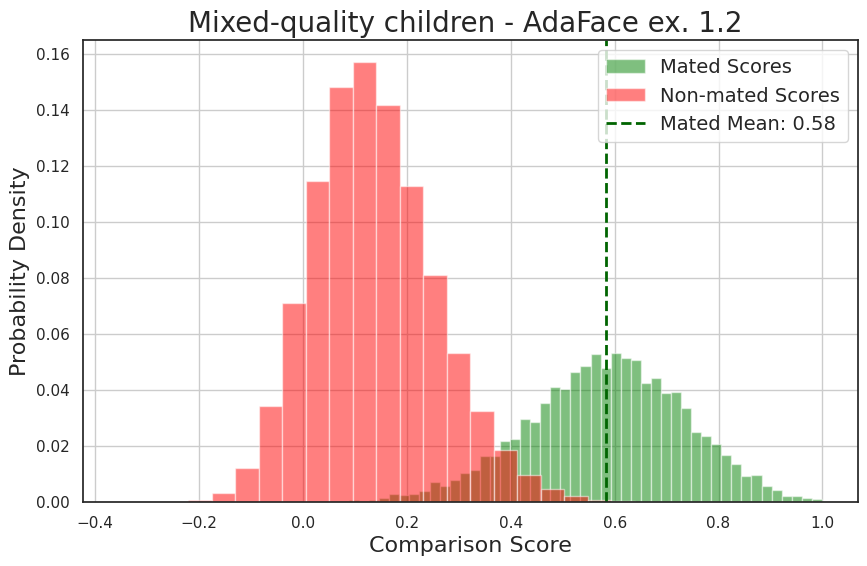

In [16]:

def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram", save_fig_path="save_fig_path", gem_som = 'A1'):
    def normalise_scores(distribution):
        return np.ones_like(distribution) / len(distribution)

    mated_mean = np.mean(mated_scores)

    plt.figure(figsize=(10, 6))

    if normalise:
        plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='green', alpha=0.5, label='Mated Scores')
        plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='red', alpha=0.5, label='Non-mated Scores')
        ylabel = "Probability Density"
    else:
        plt.hist(mated_scores, bins=50, color='green', alpha=0.5, label='Mated Scores')
        plt.hist(nonmated_scores, bins=30, color='red', alpha=0.5, label='Non-mated Scores')
        ylabel = "Count"

    plt.axvline(mated_mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

    plt.xlabel("Comparison Score", size=16)
    plt.ylabel(ylabel, size=16)
    plt.title(title, size=20)
    plt.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=14)  # Adjust legend parameters as needed

    plt.savefig(f'{save_fig_path}{gem_som}.png')

    plt.show()
plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Mixed-quality children - AdaFace ex. 1.2 ', save_fig_path=save_fig_path, gem_som = 'M1')


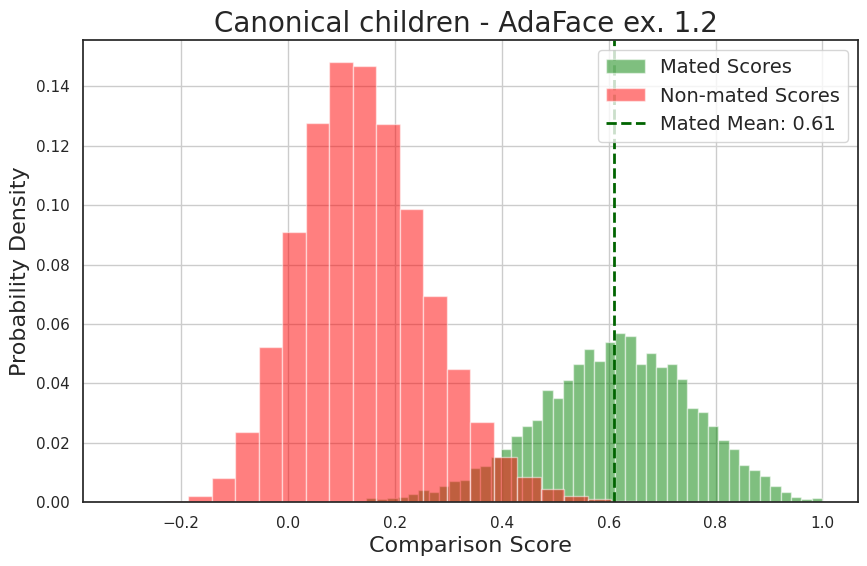

In [17]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True,title = 'Canonical children - AdaFace ex. 1.2 ', save_fig_path=save_fig_path, gem_som = 'Can1')


# DET CURVES

In [18]:
mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores1)
nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores1)

In [19]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' mixed =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' canonical =", round(d_prime_system2, round_digits))


d' mixed = 3.29216
d' canonical = 3.52265


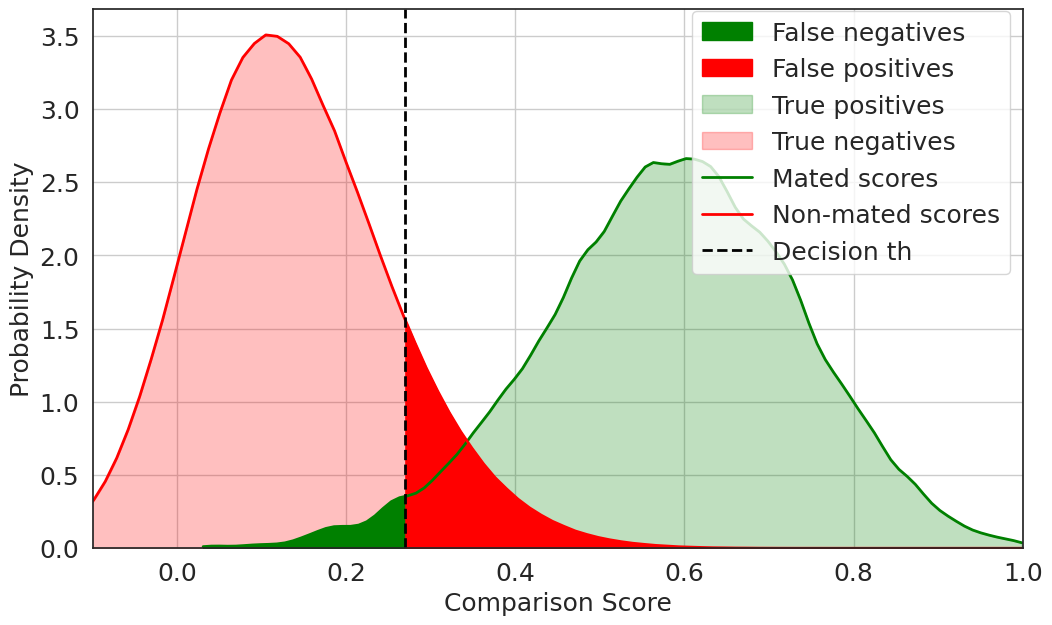

In [21]:
# threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_a <0.05].Threshold.max()
threshold1=0.270
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1, save_fig_path=save_fig_path, title='M2')

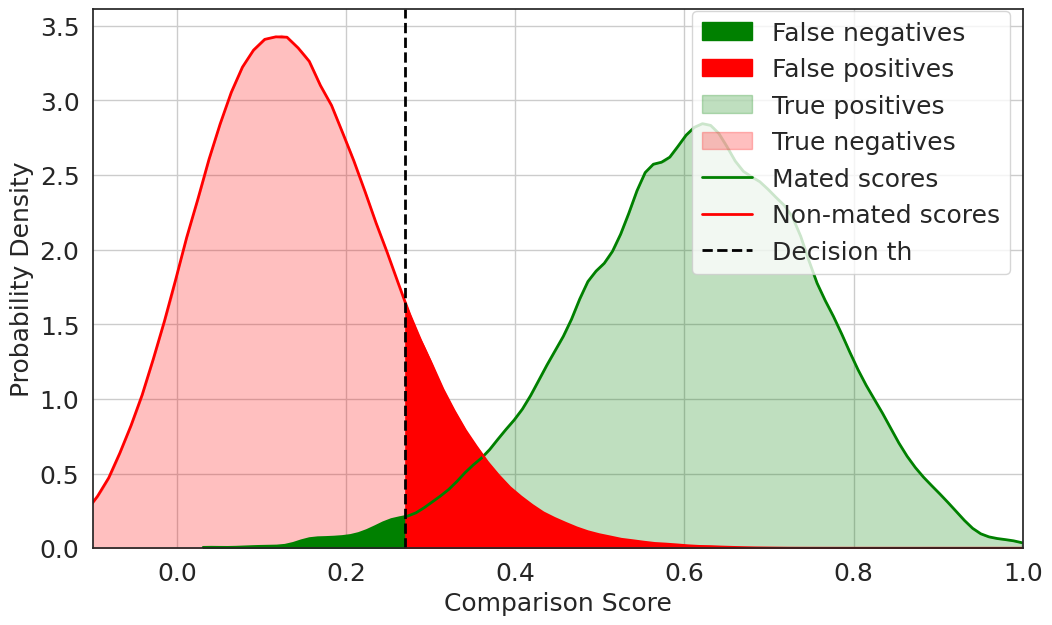

In [22]:
# threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_a <0.05].Threshold.max()
threshold2 = 0.270
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2,save_fig_path=save_fig_path, title='Can2')

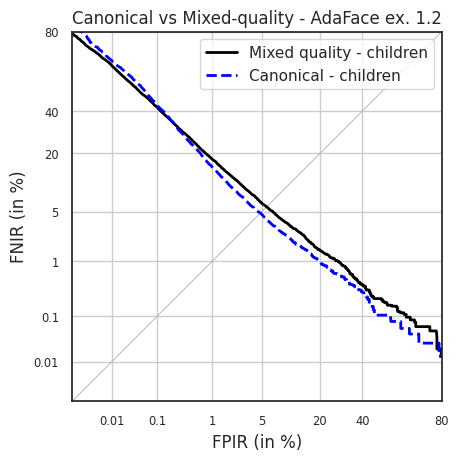

In [23]:
def DET_plotting_1_2(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, score_type= "similarity",title = 'Canonical vs Mixed-quality - AdaFace ex. 2.2', save_fig_path= 'save_fig_path'):

    figure_size = (12,7)
    alpha_shade = 0.25
    alpha_fill = 1.0
    linewidth = 2
    legend_loc = "upper left"
    legend_anchor = (1.0, 1.02)
    legend_cols = 1
    legend_fontsize = 18
    label_fontsize = 18
    tick_fontsize = 18

    system_name1 = 'Mixed quality - children'
    system_name2 = 'Canonical - children'

    det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True, plot_title=title)
    det.x_limits = np.array([1e-5, .8])
    det.y_limits = np.array([1e-5, .8])
    det.x_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
    det.x_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
    det.y_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
    det.y_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
    det.create_figure()
    det.plot(tar=adjust_scores_for_DET(mated_scores1, score_type), non=adjust_scores_for_DET(nonmated_scores1, score_type), label=system_name1)
    det.plot(tar=adjust_scores_for_DET(mated_scores2, score_type), non=adjust_scores_for_DET(nonmated_scores2, score_type), label=system_name2)
    det.legend_on(loc="upper right")
    det.show()
DET_plotting_1_2(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, "similarity",'Canonical vs Mixed-quality - AdaFace ex. 1.2', save_fig_path)
